###Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
from sklearn import svm

###Data wrangling

####Gathering data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv',
                 encoding='windows-1252')
df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


####Assessing data

In [3]:
df.isna().sum() #check nilai NA pada dataframe

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

terdapat 412 nilai NA pada kolom Attrition

In [4]:
df[df.Attrition.isna()] #menampilkan baris dengan nilai NA

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,1,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,1,...,3,80,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,24,NaN,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,...,3,80,0,6,2,3,6,3,1,3
1447,1448,42,NaN,Travel_Frequently,288,Research & Development,2,3,Life Sciences,1,...,3,80,1,24,3,1,20,8,13,9
1448,1449,38,NaN,Travel_Rarely,437,Sales,16,3,Life Sciences,1,...,2,80,0,8,5,4,3,2,1,2
1462,1463,41,NaN,Travel_Rarely,1206,Sales,23,2,Life Sciences,1,...,4,80,0,21,2,3,2,0,0,2


In [5]:
print('Duplikat:',df.duplicated().sum()) #check nilai duplikat pada dataframe

Duplikat: 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

####Cleaning data

In [7]:
df.fillna(value=0, inplace= True)

Mengganti nilai NA dengan nilai 0, dengan asumsi bahwa 0 adalah karyawan yang sedang bekerja di perusahaan

In [8]:
df.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Sudah tidak terdapat nilai NA didalam dataframe

###Exploratory Data Analysis (EDA)

Kita akan mengasumsikan data yang tersedia hanya sebagai berikut.

In [9]:
df_copy= df[['Attrition','Age', 'Department','JobLevel','Gender', 'PercentSalaryHike', 'YearsInCurrentRole','YearsAtCompany']]
df_copy.head()

,Attrition,Age,Department,JobLevel,Gender,PercentSalaryHike,YearsInCurrentRole,YearsAtCompany
0,0.0,38,Human Resources,1,Male,11,2,6
1,1.0,37,Research & Development,2,Female,15,0,1
2,1.0,51,Research & Development,1,Male,12,0,10
3,0.0,42,Sales,4,Female,14,4,20
4,0.0,40,Research & Development,1,Female,14,3,5


In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           1470 non-null   float64
 1   Age                 1470 non-null   int64  
 2   Department          1470 non-null   object 
 3   JobLevel            1470 non-null   int64  
 4   Gender              1470 non-null   object 
 5   PercentSalaryHike   1470 non-null   int64  
 6   YearsInCurrentRole  1470 non-null   int64  
 7   YearsAtCompany      1470 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 92.0+ KB


1.   Berapa jumlah karyawan yang telah berhenti?
2.   Variabel apa yang paling mepengaruhi karyawan untuk berhenti?
3.   Departement apa yang memiliki jumlah karyawan berhenti terbanyak?
4.   Bagaimana distribusi data dari setiap variabel?





#####1. Persentase karyawan yang keluar dari perusahaan

In [11]:
b_df = df_copy
b_df['Attritions'] = b_df['Attrition'].apply(lambda x: 'Tidak bekerja' if x>=1 else 'Bekerja')
b_df = b_df.drop(columns=['Attrition'])
b_df.head()

<ipython-input-11-515f032b8259>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_df['Attritions'] = b_df['Attrition'].apply(lambda x: 'Tidak bekerja' if x>=1 else 'Bekerja')


,Age,Department,JobLevel,Gender,PercentSalaryHike,YearsInCurrentRole,YearsAtCompany,Attritions
0,38,Human Resources,1,Male,11,2,6,Bekerja
1,37,Research & Development,2,Female,15,0,1,Tidak bekerja
2,51,Research & Development,1,Male,12,0,10,Tidak bekerja
3,42,Sales,4,Female,14,4,20,Bekerja
4,40,Research & Development,1,Female,14,3,5,Bekerja


,count
Attritions,
Bekerja,1291
Tidak bekerja,179


Text(0, 0.5, '')

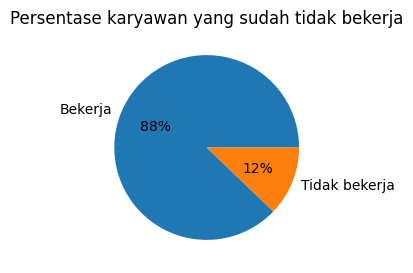

In [12]:
b_df.groupby(by = ['Attritions']).Attritions.count()

display(b_df.Attritions.value_counts().to_frame())
ax = b_df.Attritions.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(3,3))
plt.title('Persentase karyawan yang sudah tidak bekerja')
plt.xlabel(None)
plt.ylabel(None)

Terdapat 179 karyawan yang sudah tidak bekerja atau 12% dari total karyawan

#####2. Variabel yang paling mengeparuhi karyawan untuk berhenti

In [13]:
df_cor= df_copy
df_cor['Department']= df_cor['Department'].replace({'Human Resources':0, 'Research & Development':1, 'Sales':2})
df_cor['Gender']= df_cor['Gender'].replace({'Female':1, 'Male':0})
df_cor = df_cor.drop(columns=['Attritions'])
df_cor.corr()

<ipython-input-13-4eb8f2e7b73d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor['Department']= df_cor['Department'].replace({'Human Resources':0, 'Research & Development':1, 'Sales':2})
<ipython-input-13-4eb8f2e7b73d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor['Gender']= df_cor['Gender'].replace({'Female':1, 'Male':0})


,Attrition,Age,Department,JobLevel,Gender,PercentSalaryHike,YearsInCurrentRole,YearsAtCompany
Attrition,1.000000,-0.140856,0.052685,-0.134312,-0.002548,-0.001424,-0.127525,-0.110546
Age,-0.140856,1.000000,-0.031882,0.509604,0.036311,0.003634,0.212901,0.311309
Department,0.052685,-0.031882,1.000000,0.101963,0.041583,-0.007840,0.056315,0.022920
JobLevel,-0.134312,0.509604,0.101963,1.000000,0.039403,-0.034730,0.389447,0.534739
Gender,-0.002548,0.036311,0.041583,0.039403,1.000000,-0.002733,0.041483,0.029747
PercentSalaryHike,-0.001424,0.003634,-0.007840,-0.034730,-0.002733,1.000000,-0.001520,-0.035991
YearsInCurrentRole,-0.127525,0.212901,0.056315,0.389447,0.041483,-0.001520,1.000000,0.758754
YearsAtCompany,-0.110546,0.311309,0.022920,0.534739,0.029747,-0.035991,0.758754,1.000000


In [14]:
df_abs = df_cor.corr()
df_abs = df_abs['Attrition'].drop('Attrition')
df_abs.abs().sort_values(ascending=False)

Age                   0.140856
JobLevel              0.134312
YearsInCurrentRole    0.127525
YearsAtCompany        0.110546
Department            0.052685
Gender                0.002548
PercentSalaryHike     0.001424
Name: Attrition, dtype: float64

In [15]:
df_corr_to_attrition = pd.DataFrame({
    'variables': ['Age', 'Department', 'JobLevel', 'Gender', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsAtCompany'],
    'corr_values': [abs(-0.140856), 0.052685, abs(-0.134312), abs(-0.002548), abs(-0.001424), abs(-0.127525), abs(-0.110546)]
})
df_corr_to_attrition.sort_values(by=('corr_values'), ascending=False)

,variables,corr_values
0,Age,0.140856
2,JobLevel,0.134312
5,YearsInCurrentRole,0.127525
6,YearsAtCompany,0.110546
1,Department,0.052685
3,Gender,0.002548
4,PercentSalaryHike,0.001424


Variabel umur menjadi paling berpengaruh terhadap karyawan untuk berhenti

#####3. Jumlah karyawan berhenti berdasarkan departement

In [16]:
b_df.groupby(by = ['Department']).Attritions.count()

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Attritions, dtype: int64

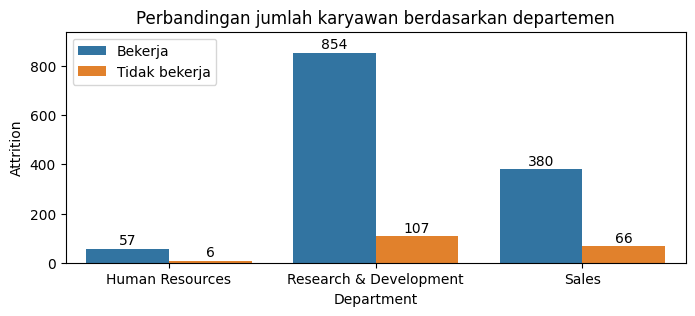

In [17]:
plt.figure(figsize=(8, 3))
ax = sns.countplot(x=df.Department, hue=df_copy.Attritions)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

plt.title('Perbandingan jumlah karyawan berdasarkan departemen', )
plt.xlabel('Department')
plt.ylabel('Attrition')
plt.legend(loc='upper left')

Dari analisa diatas, dapat dilihat Departemen Research & Development menjadi departemen dengan jumlah karyawan berhenti terbanyak

#####4. Distribusi data variabel

In [18]:
#membuat data frame khusus karyawan yang sudah berhenti
r_df = b_df
r_df = r_df[r_df['Attritions']>= 'Tidak bekerja']
r_df.head(5)

,Age,Department,JobLevel,Gender,PercentSalaryHike,YearsInCurrentRole,YearsAtCompany,Attritions
1,37,Research & Development,2,Female,15,0,1,Tidak bekerja
2,51,Research & Development,1,Male,12,0,10,Tidak bekerja
7,55,Research & Development,5,Male,13,2,5,Tidak bekerja
11,20,Research & Development,1,Male,19,0,1,Tidak bekerja
24,24,Research & Development,1,Male,16,0,2,Tidak bekerja


In [19]:
def categorical_plot(features, r_df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=r_df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=r_df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

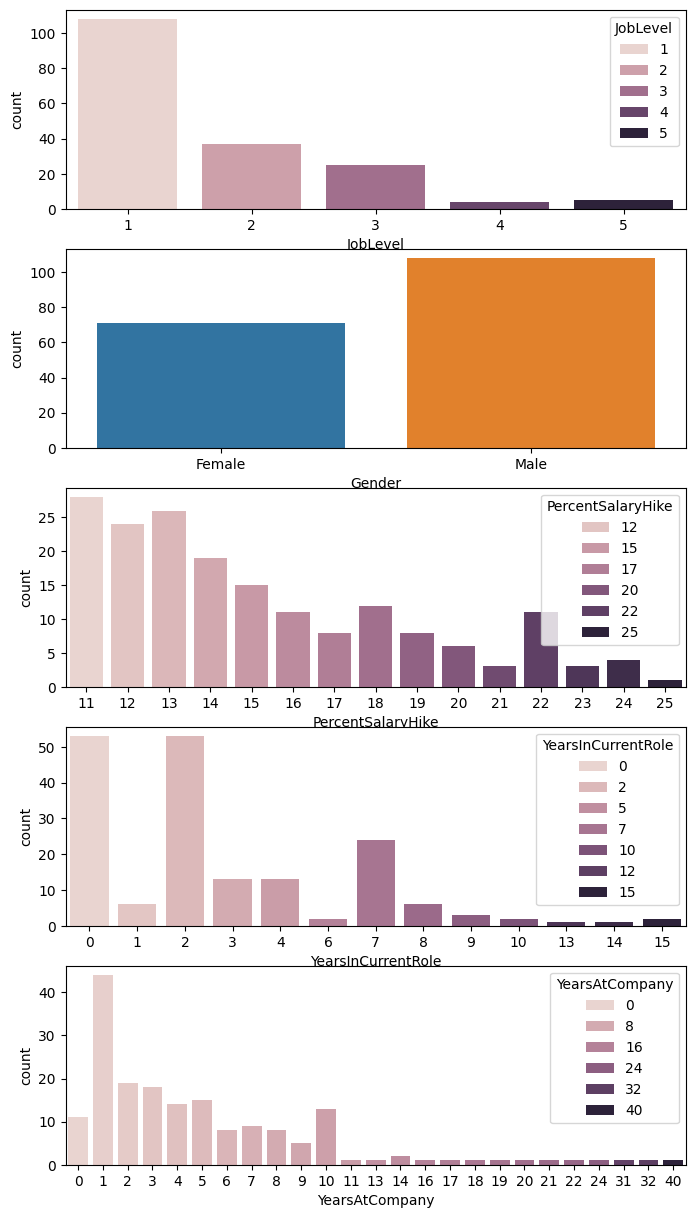

In [20]:
categorical = ['JobLevel', 'Gender','PercentSalaryHike', 'YearsInCurrentRole', 'YearsAtCompany']

fig, ax = plt.subplots(len(categorical), 1,figsize=(8,15))
for i, feature in enumerate(categorical):
  sns.countplot(data=r_df, x=feature, hue=feature, ax=ax[i])
plt.show()

Berdasarkan hasil analisa diatas, dapat kita lihat:
1. karyawan dengan job level memiliki jumlah berhenti bekerja terbanyak job level lainnya
2. Karyawan dengan jenis kelamin laki-laki memiliki jumlah berhenti terbanyak dibandiingkan perempuan
3. Karyawan yang memiliki kenaikan 11%-13% memiliki jumlah berhenti terbanyak dibandingkan persentase kenaikan gaji lainnya
4. Karyawan yang menempati posisi yang sama selama kurang dari 1 tahun & 2 tahun memiliki jumlah berhenti terbanyak dibandingkan jumlah tahun lainnya
5. Karyawan dengan masa kerja 1 tahun memiliki jumlah berhenti tebanyak dibandingkan masa kerja lainnya

###Data preparation

In [21]:
df_cor.head(5)

,Attrition,Age,Department,JobLevel,Gender,PercentSalaryHike,YearsInCurrentRole,YearsAtCompany
0,0.0,38,0,1,0,11,2,6
1,1.0,37,1,2,1,15,0,1
2,1.0,51,1,1,0,12,0,10
3,0.0,42,2,4,1,14,4,20
4,0.0,40,1,1,1,14,3,5


In [22]:
#mengubah kolom Attrition menjadi integrer
df_cor['Attrition']= df_cor['Attrition'].astype(int)
df_cor.head(5)

,Attrition,Age,Department,JobLevel,Gender,PercentSalaryHike,YearsInCurrentRole,YearsAtCompany
0,0,38,0,1,0,11,2,6
1,1,37,1,2,1,15,0,1
2,1,51,1,1,0,12,0,10
3,0,42,2,4,1,14,4,20
4,0,40,1,1,1,14,3,5


In [23]:
#memeriksa unbalanced data
df_cor['Attrition'].value_counts()

Attrition
0    1291
1     179
Name: count, dtype: int64

In [24]:
#mengatasi unbalaced data
df_majority = df_cor[(df_cor['Attrition']==0)]
df_minority = df_cor[(df_cor['Attrition']==1)]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples= 1291,
                                 random_state=42)

df_train = pd.concat([df_minority_upsampled, df_majority])

df_train['Attrition'].value_counts()

Attrition
1    1291
0    1291
Name: count, dtype: int64

In [25]:
#memisahkan atribut & label
X= df_train.drop(columns='Attrition')
y = df_train['Attrition']
y

787     1
724     1
106     1
818     1
557     1
       ..
1462    0
1463    0
1465    0
1466    0
1468    0
Name: Attrition, Length: 2582, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display('Jumlah data untuk X_train :', X_train.shape[0])
display('Jumlah data untuk X_test :', X_test.shape[0])
display('Jumlah data untuk y_train :', y_train.shape[0])
display('Jumlah data untuk y_test :', y_test.shape[0])

'Jumlah data untuk X_train :'

2065

'Jumlah data untuk X_test :'

517

'Jumlah data untuk y_train :'

2065

'Jumlah data untuk y_test :'

517

###Modeling

In [27]:
#membuat model data latih
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
X_train_predict = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_predict, y_train)
print ('akurasi training :', train_data_accuracy )

akurasi training : 0.6300242130750605


In [29]:
X_test_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, y_test)
print ('akurasi test :', test_data_accuracy)

akurasi test : 0.6595744680851063


Dari hasi modeling diatas didapatkan akurasi training sebesar 63,00% &
akurasi test sebesar 65,96%

###Evaluation

In [30]:
test_data_1 = np.array([[38,	0, 1,	0,	11,	2,	6]])
test_1 = test_data_1.reshape(1,-1)

predict_1 = model.predict(test_1)
print (predict_1)

if (predict_1[0]==0):
  print('Karyawan masih bekerja')
else:
  print('Karyawan sudah tidak bekerja')

[0]
Karyawan masih bekerja


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [31]:
test_data_2 = np.array([[51,	1,	1,	0,	12,	0,	10]])
test_2 = test_data_2.reshape(1,-1)

predict_2 = model.predict(test_2)
print (predict_2)

if (predict_2[0]==0):
  print('Karyawan masih bekerja')
else:
  print('Karyawan sudah tidak bekerja')

[1]
Karyawan sudah tidak bekerja


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


dengan tingkat akurasi 65,96% model dapat membuat prediksi dengan tepat, yaitu pada percobaan kondisi predict_1 model memprediksi bahwa karyawan tetap bekerja, sedangkan pada kondisi predict_2 model memprediksi bahwa karyawan akan berhenti bekerja.

###Save model

In [32]:
filename = 'Attrition.sav'
pickle.dump(model, open(filename, 'wb'))